# Space missions data understanding, visualization and analysis

Who does not love Space? 
This DataSet was scraped from https://nextspaceflight.com/launches/past/?page=1 and includes all the space missions since the beginning of Space Race (1957) 

![Image](https://i1.wp.com/matmatch.com/blog/wp-content/uploads/2019/03/AdobeStock_80273384-compressor.jpeg?resize=2000%2C1125&ssl=1)

## Importing the libraries

In [84]:
import numpy as np  # Numpy helps us to do complex and high-level mathematical functions on large,
                    # multi-dimentional array and matrices
    
import pandas as pd # Pandas offers us data structures and operations for manipulating numerical 
                    #tables and time series
    
import matplotlib.pyplot as plt # Matplotlib helps us to embed plots into applications, commonly used
                                # for data visualisation
    
import seaborn as sns # Seaborn provides a high-level interface for drawing attractive and informative 
                      # statistical graphics.

## Reading and making a very basic understanding of the dataset

In [85]:
df = pd.read_csv("../input/all-space-missions-from-1957/Space_Corrected.csv")# Reads the .csv file and converts 
                                                                             # to pandas Dataframe Object

In [86]:
df.head()# Shows top rows of the dataset (default value-5)

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [87]:
df.info() # Gathering more knowledge about the data like number of rows and columns, datatype and not-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4324 non-null   int64 
 1   Unnamed: 0.1    4324 non-null   int64 
 2   Company Name    4324 non-null   object
 3   Location        4324 non-null   object
 4   Datum           4324 non-null   object
 5   Detail          4324 non-null   object
 6   Status Rocket   4324 non-null   object
 7    Rocket         964 non-null    object
 8   Status Mission  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [88]:
df.shape # shape of the dataframe object

(4324, 9)

## Visualising the Data

If we look at the location column, we will find that name of the launch site is combined with the country. We must seperate out the country to have a more meaningfull insight into the data.

In [89]:
df["Country"] = df["Location"].apply(lambda location: location.split(", ")[-1])
# We cant directly use a function on a dataframe object. So, we use apply method.

In [90]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Country
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA


As we did for the location column, we also need to seperate the year from the Datum column. We can always extract the year by using split but we have a very simple workaround by using a method in pandas library.
to_datatime converts time in any format to a proper datetime format from which details such as year,month and hour can be extracted very easily.

In [91]:
df['DateTime'] = pd.to_datetime(df['Datum']) 
df['Year'] = df['DateTime'].apply(lambda datetime: datetime.year)

In [92]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Country,DateTime,Year
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,2020-08-07 05:12:00+00:00,2020
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,2020-08-06 04:01:00+00:00,2020
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,2020-08-04 23:57:00+00:00,2020
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,2020-07-30 21:25:00+00:00,2020
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,2020-07-30 11:50:00+00:00,2020


Now, let us plot the data of count vs Company

<AxesSubplot:xlabel='count', ylabel='Company Name'>

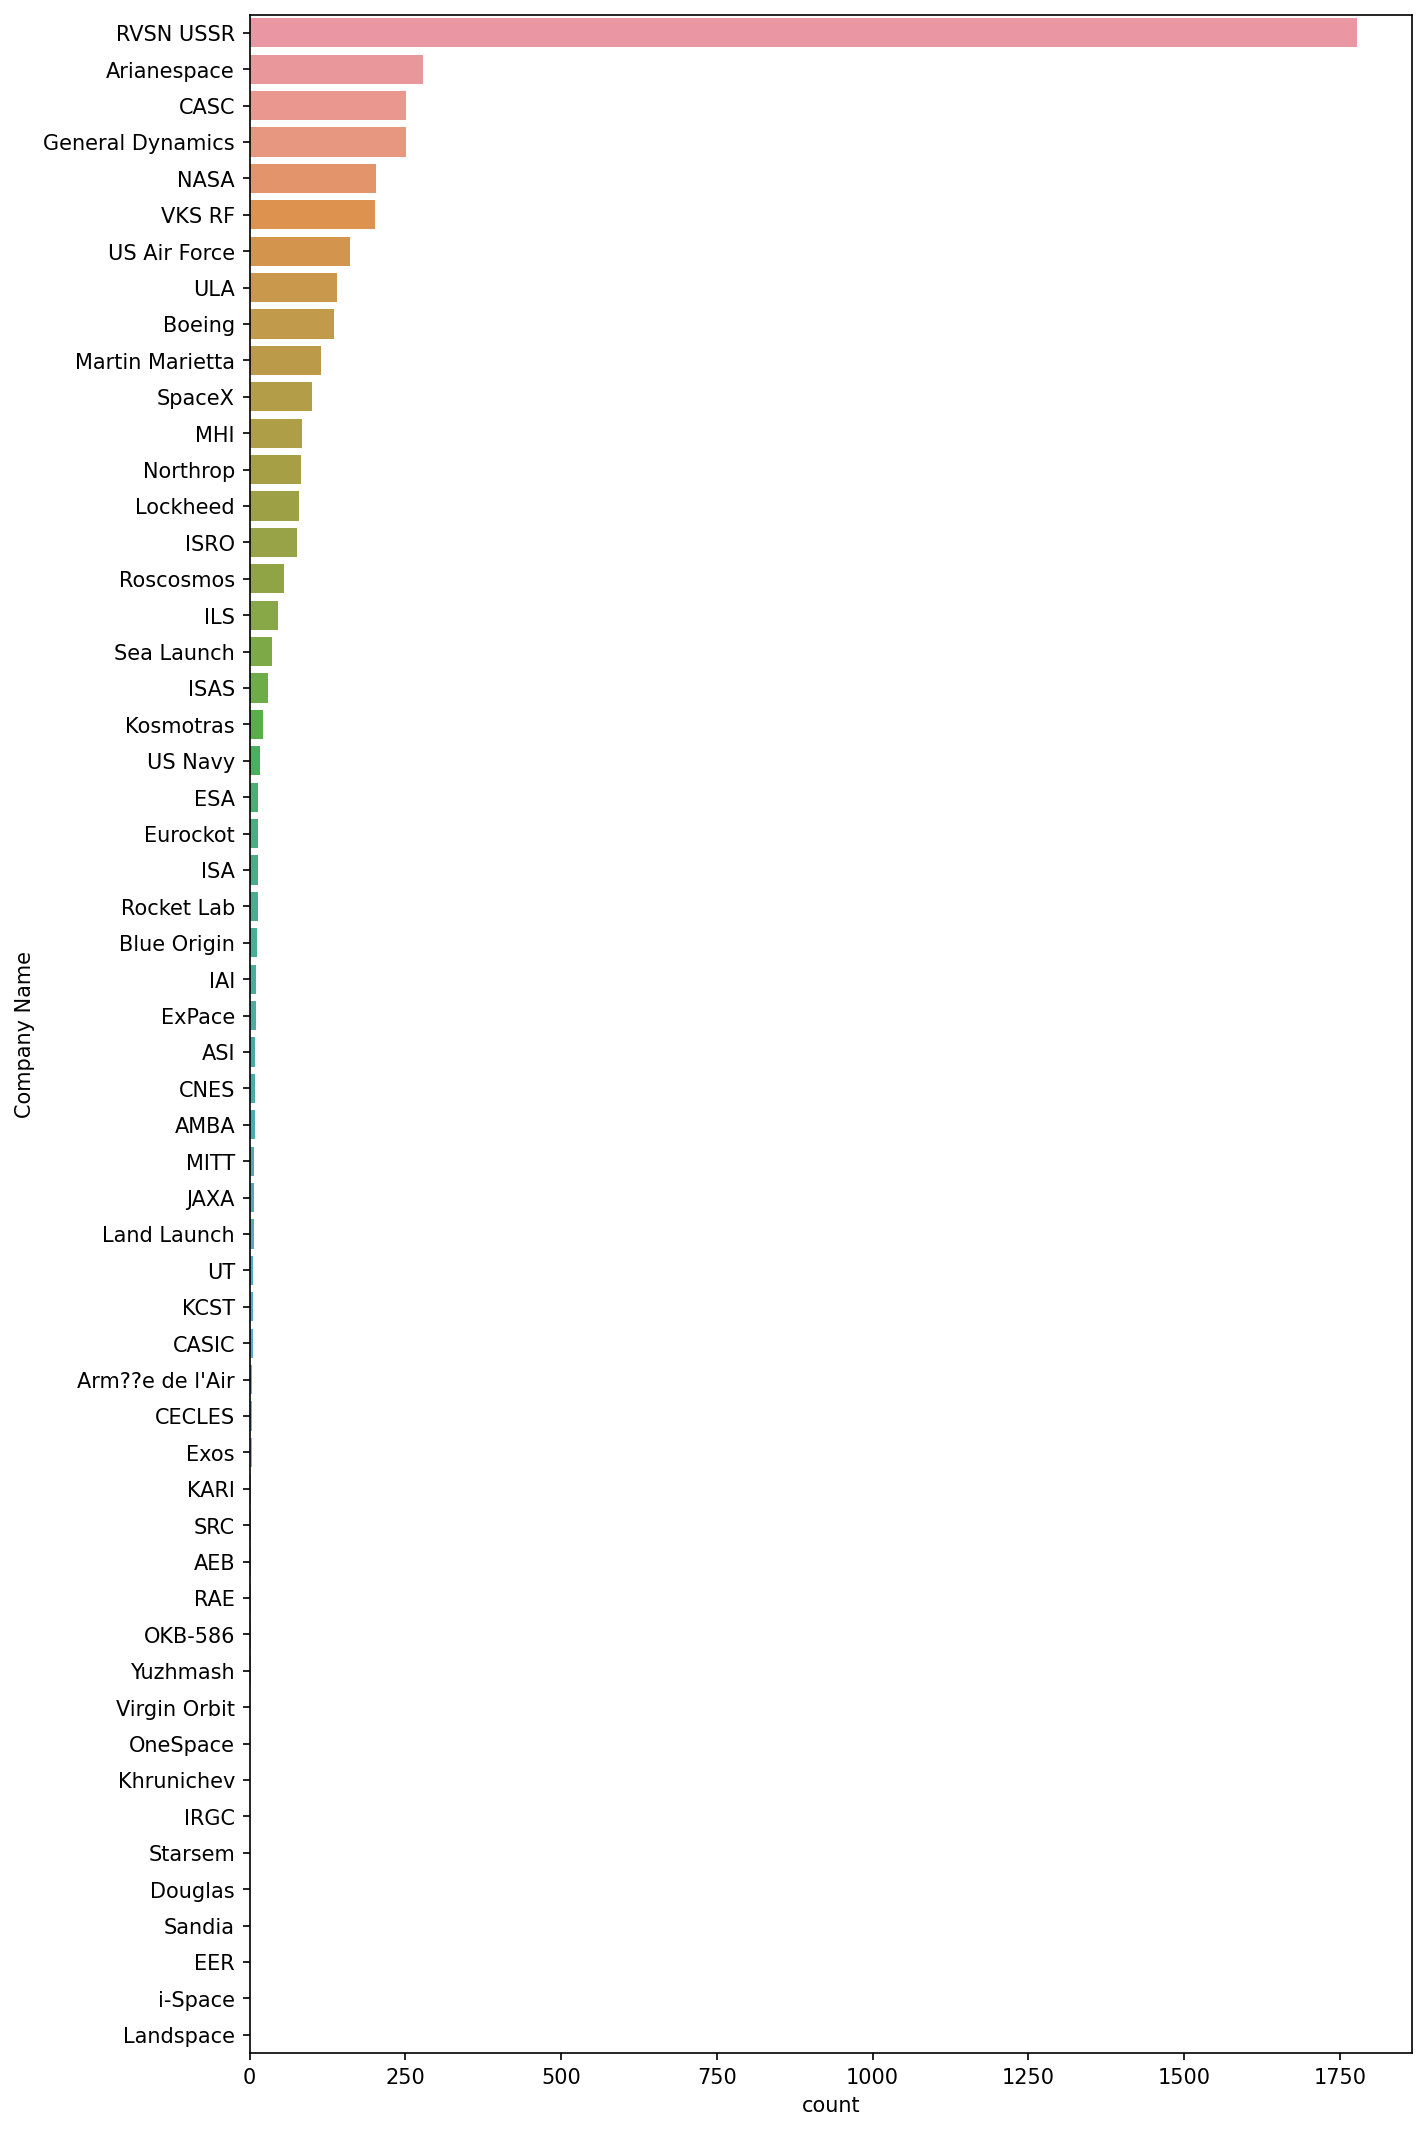

In [93]:
plt.figure(figsize=(10,18),dpi=150)# figsize sets the height and width of the figure.
sns.countplot(y="Company Name", data=df, order=df["Company Name"].value_counts().index)# countplot method is
# used to plot count vs any column in a dataset.order sorts the bar plots by the value provided.

In the above graph, we notice that no plot can be seen for many companies whereas one company fully takes up the space. This means our scaling is not correct. We have to change it to logarithmic scale.

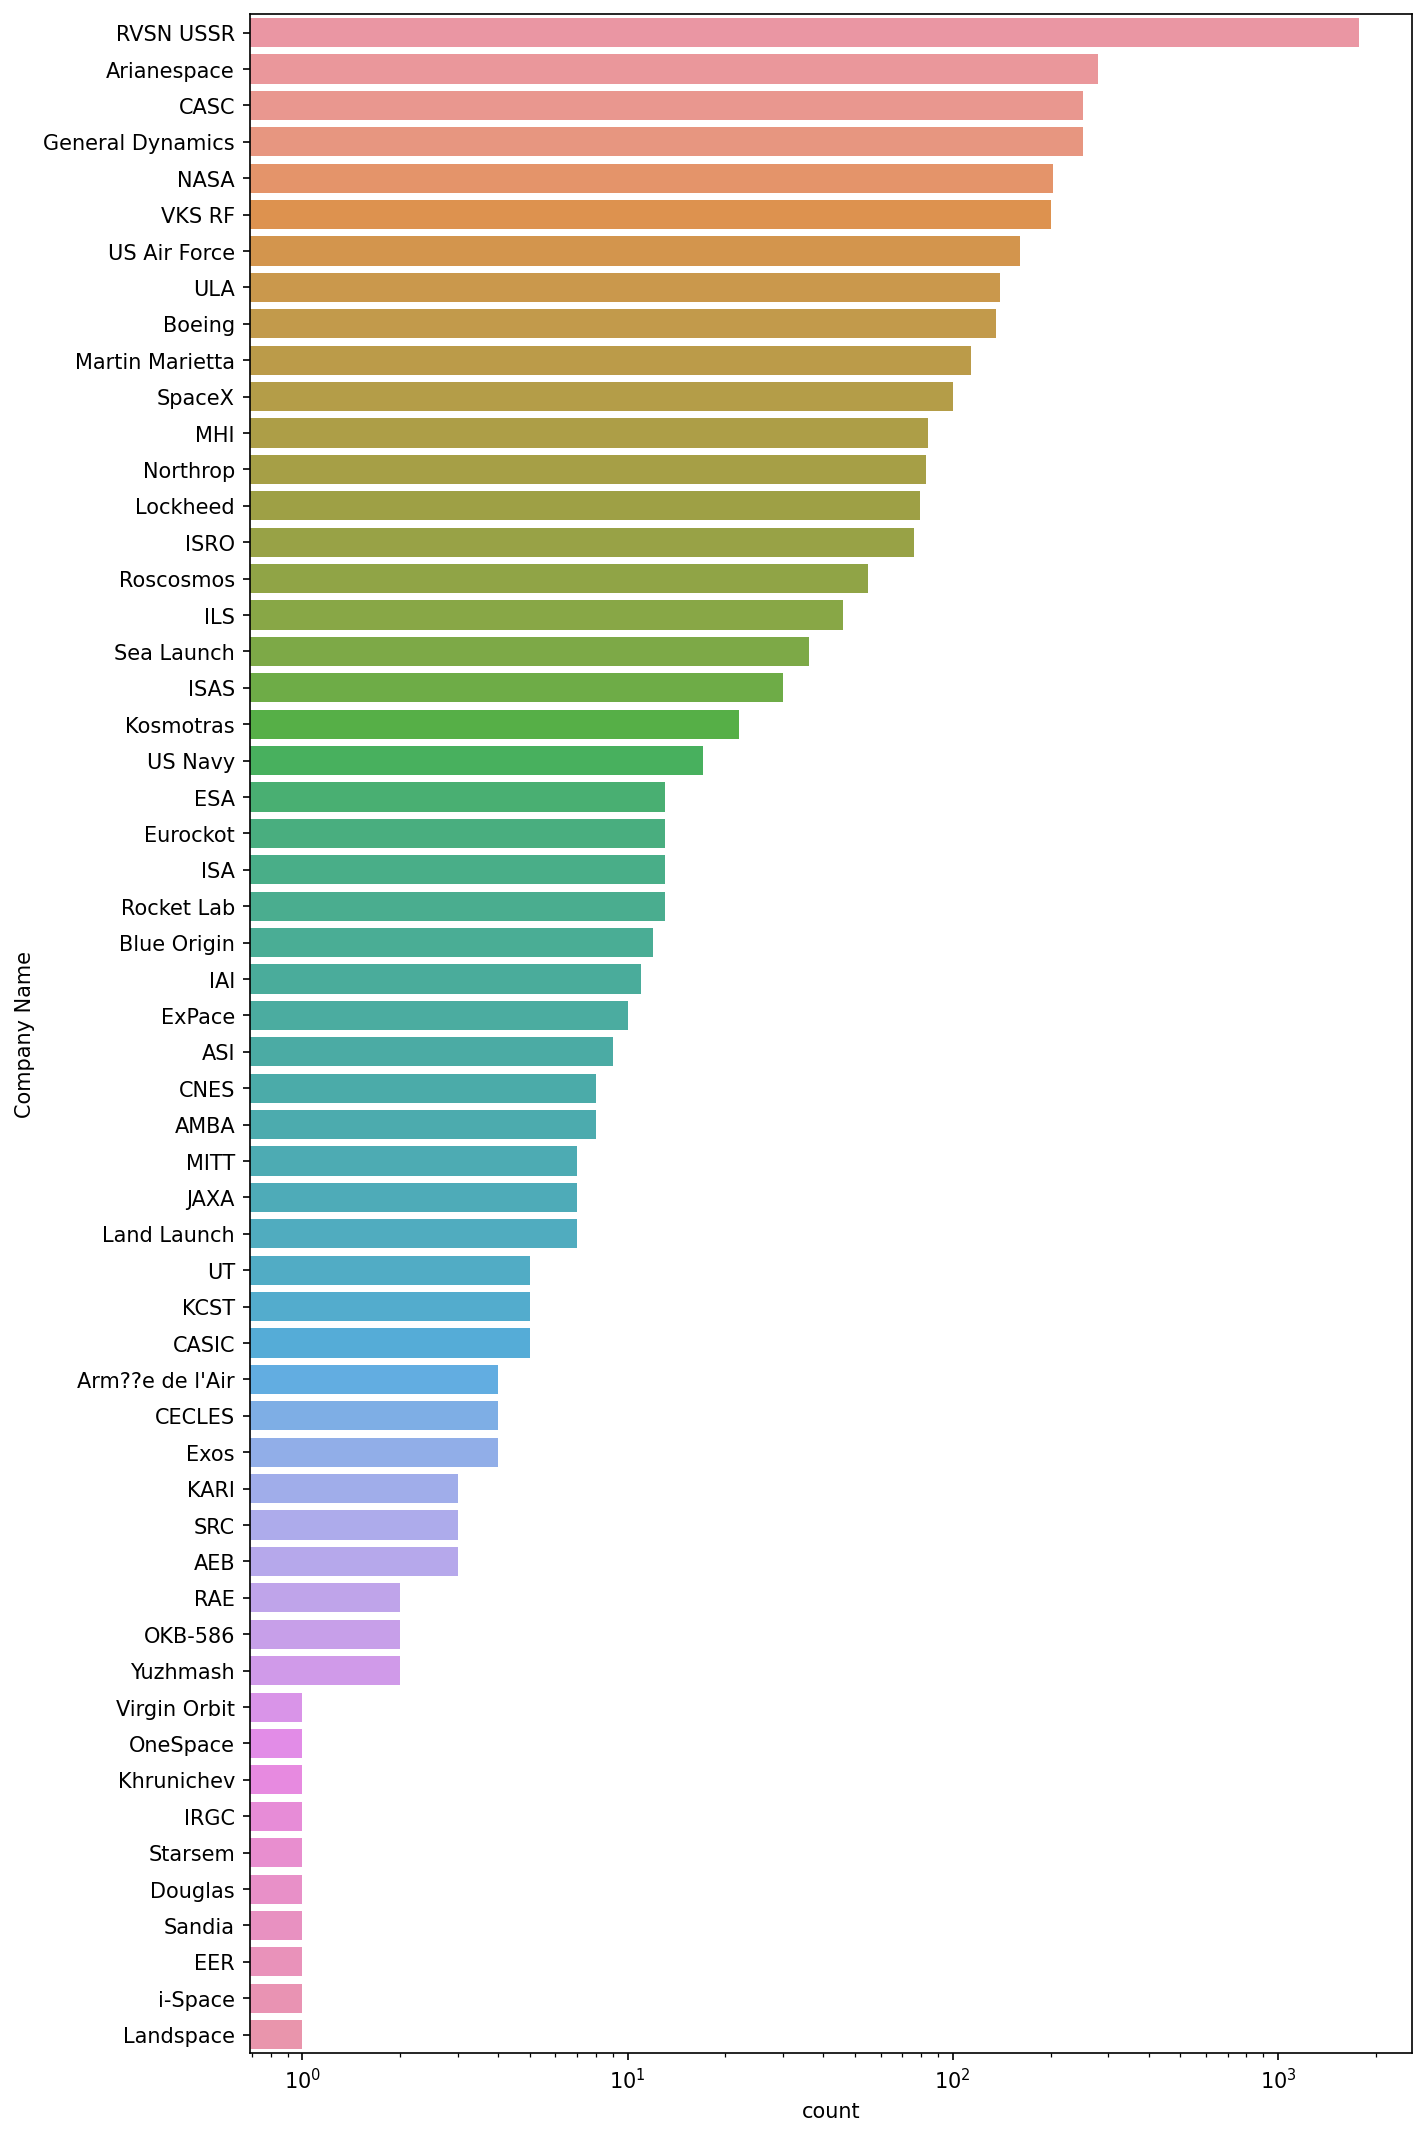

In [94]:
plt.figure(figsize=(10,18),dpi=150)
ax = sns.countplot(y="Company Name", data=df, order=df["Company Name"].value_counts().index)
ax.set_xscale("log")# Sets the scale to logarithmic value

**We can clearly see from this plot that RSVN USSR is the company to have the most space missions while NASA sits on the 5th place.**

Now, let us plot the count vs country and we will have the same approach like we did in the previous plot.

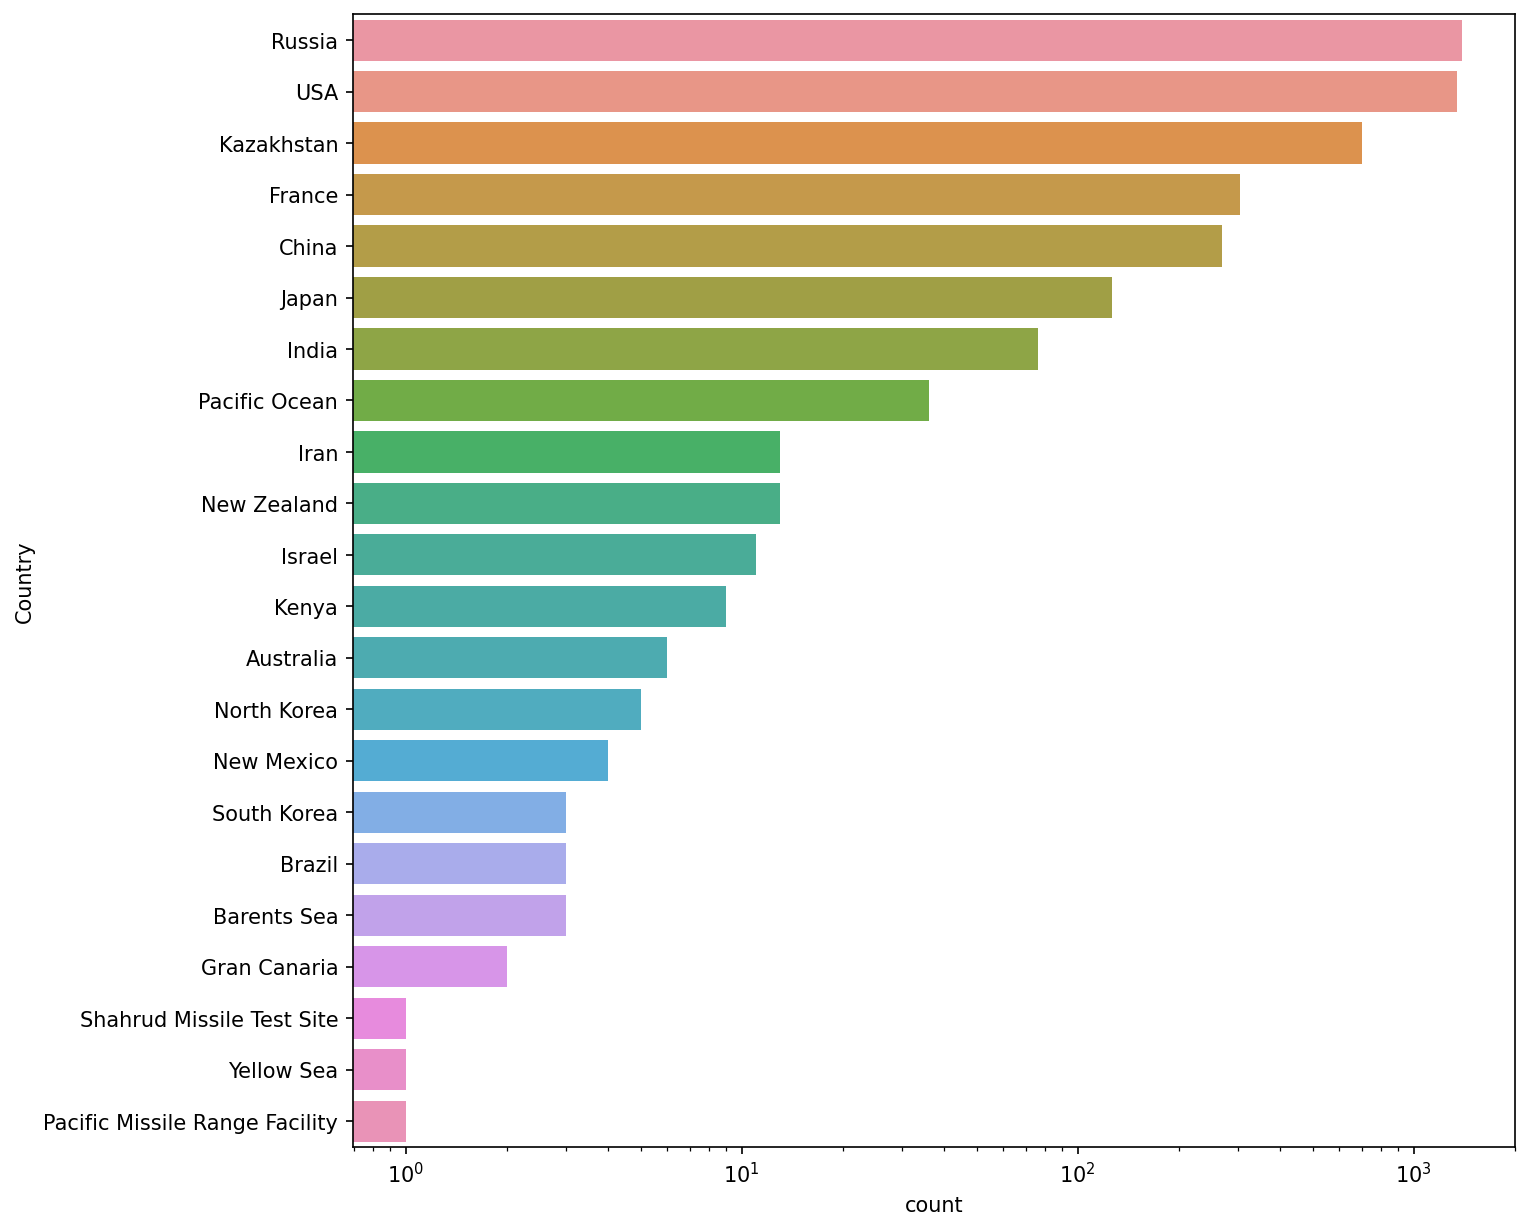

In [95]:
plt.figure(figsize=(10,10),dpi=150)
ax = sns.countplot(y="Country", data=df, order=df["Country"].value_counts().index)
ax.set_xscale("log")

**We infer from this that Russia had the most space missions, USA was just short of them while India sits at 7th place.**

Now, let us plot count vs launch sites. But before that we have to extract out launch site from the Location column.

In [96]:
df["Launch_Site"] = df["Location"].apply(lambda location: ", ".join(location.split(", ")[:-1]))

In [97]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Country,DateTime,Year,Launch_Site
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,2020-08-07 05:12:00+00:00,2020,"LC-39A, Kennedy Space Center, Florida"
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,2020-08-06 04:01:00+00:00,2020,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce..."
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,2020-08-04 23:57:00+00:00,2020,"Pad A, Boca Chica, Texas"
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,2020-07-30 21:25:00+00:00,2020,"Site 200/39, Baikonur Cosmodrome"
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,2020-07-30 11:50:00+00:00,2020,"SLC-41, Cape Canaveral AFS, Florida"


/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0, flags=flags)


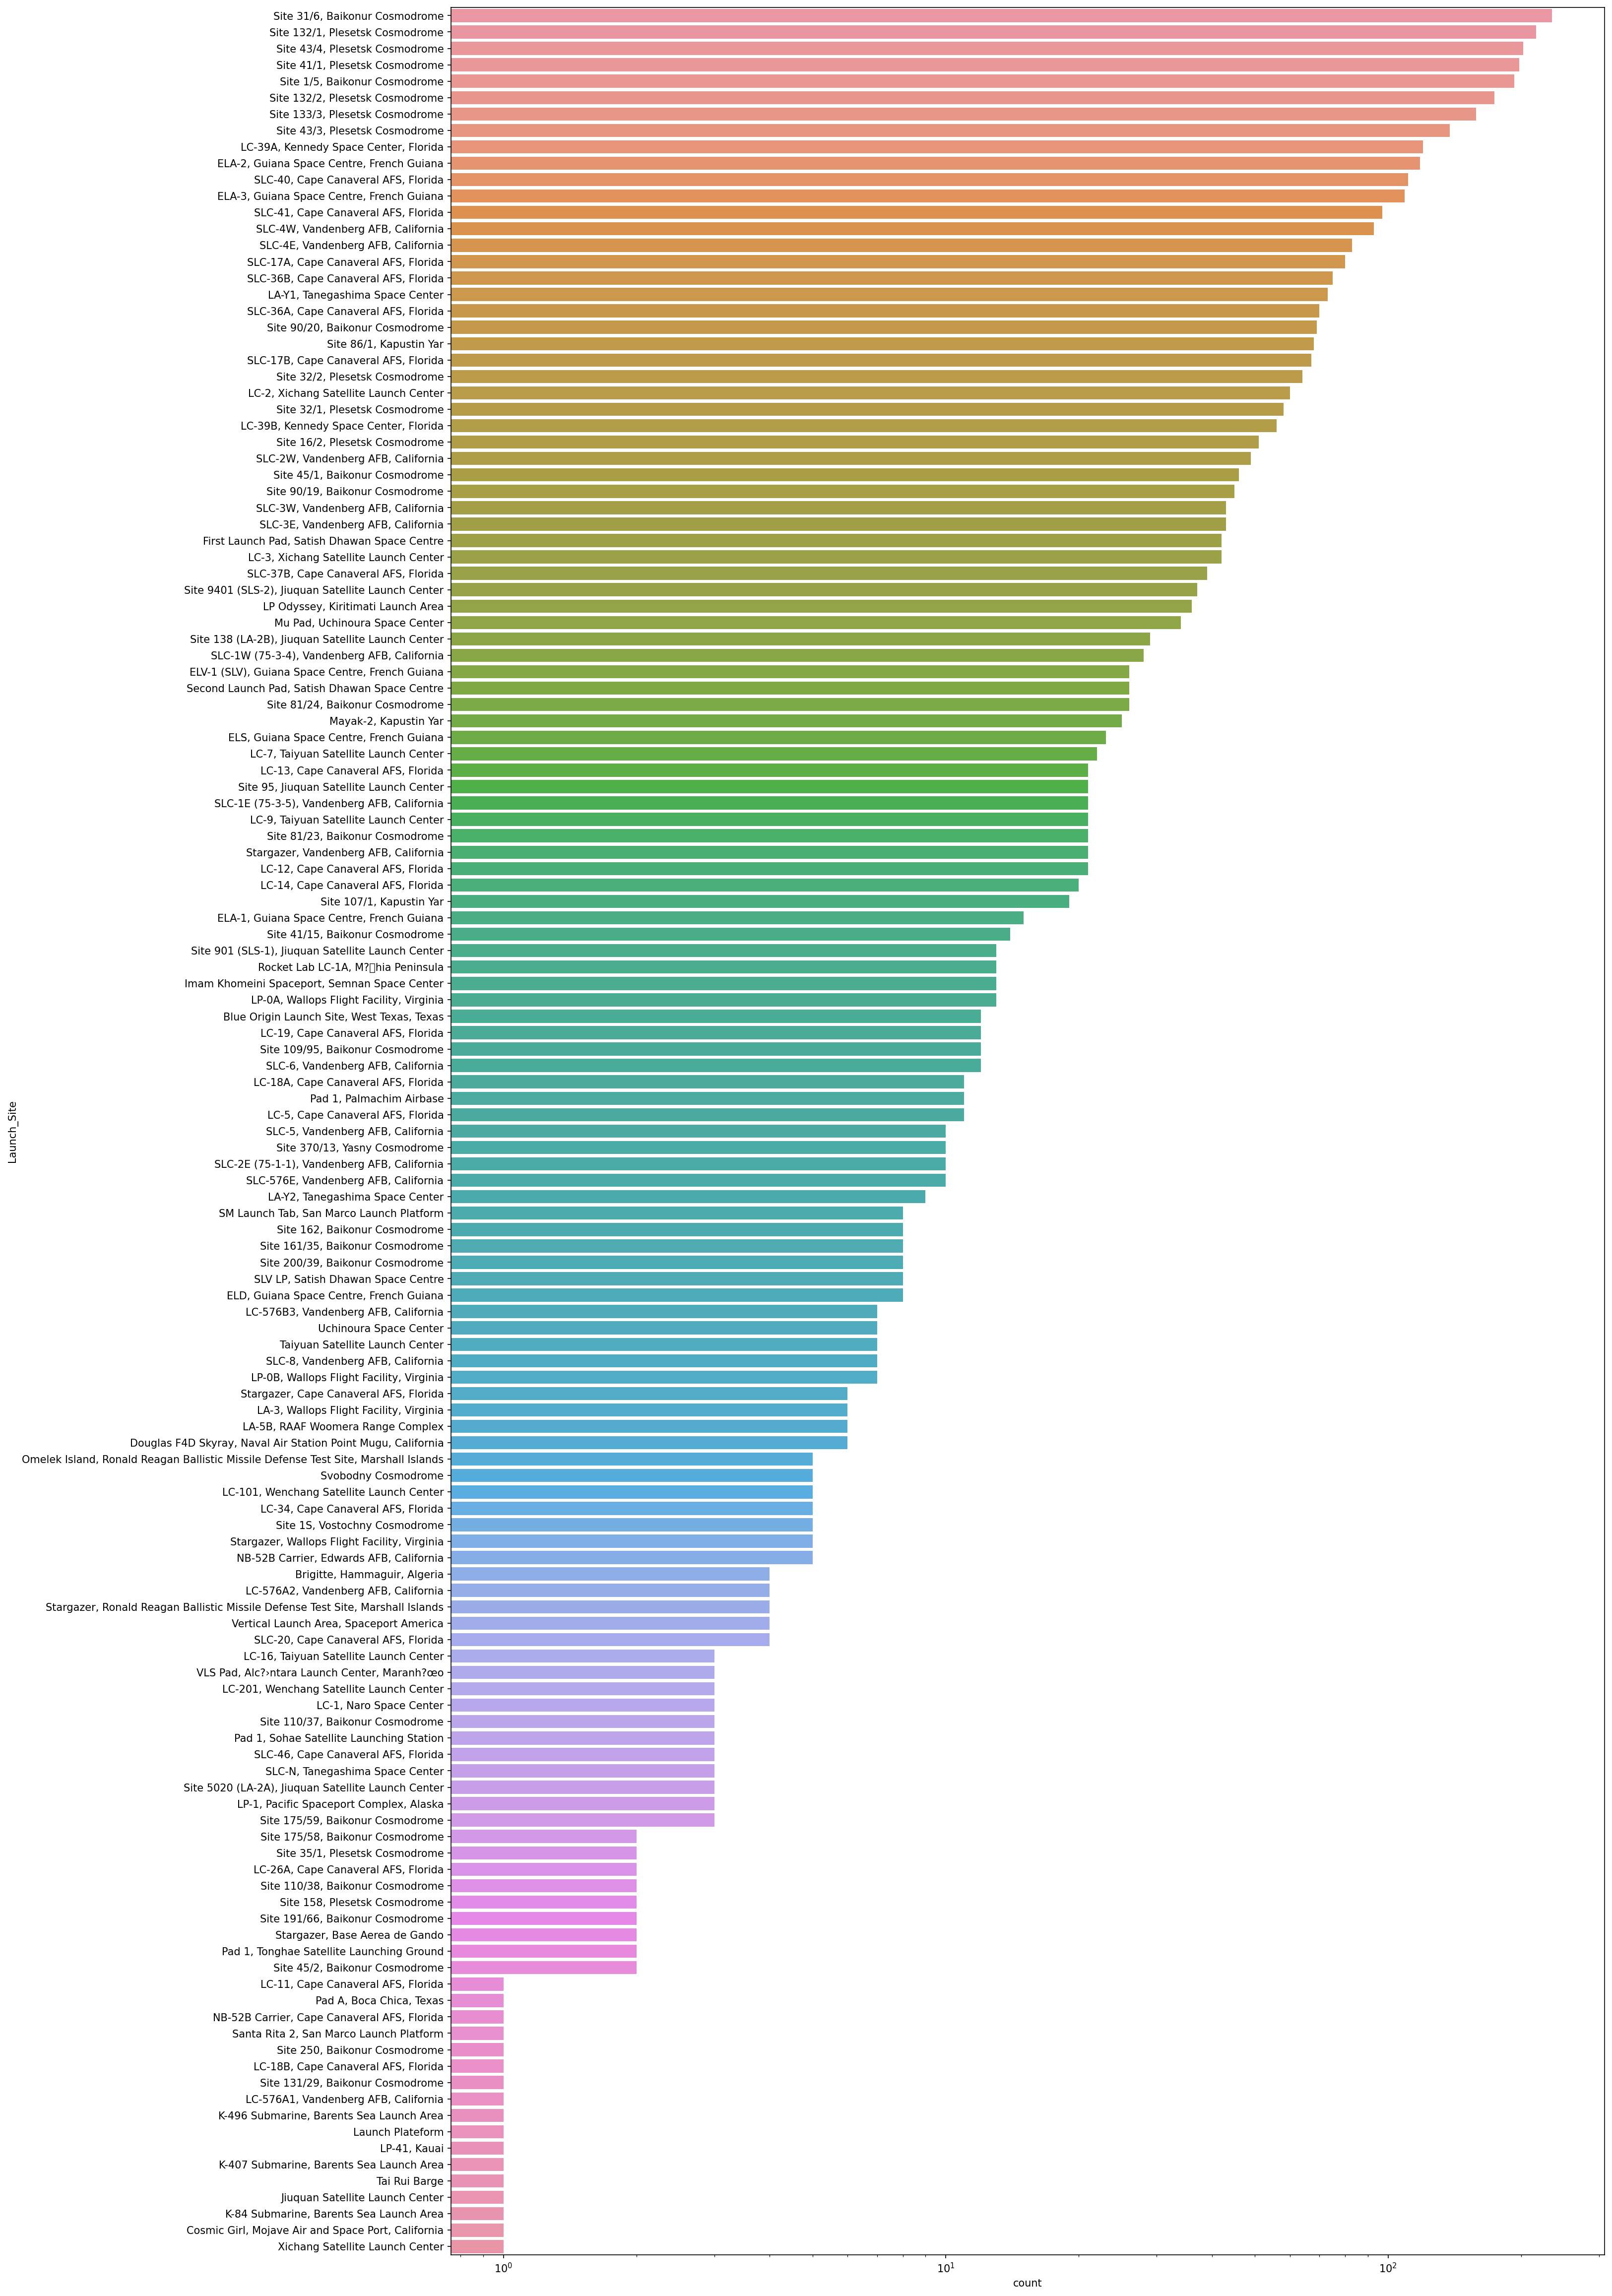

In [98]:
plt.figure(figsize=(20,40),dpi=150)
ax = sns.countplot(y="Launch_Site", data=df, order=df["Launch_Site"].value_counts().index)
ax.set_xscale("log")

**From this plot, we can see that Site 31/6, Baikonur Cosmodrone is the most used launch site**

Now, lets see the top 20 companies in satellite mission

Top 20 Companies in Satellite Mission: 
 RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Name: Company Name, dtype: int64


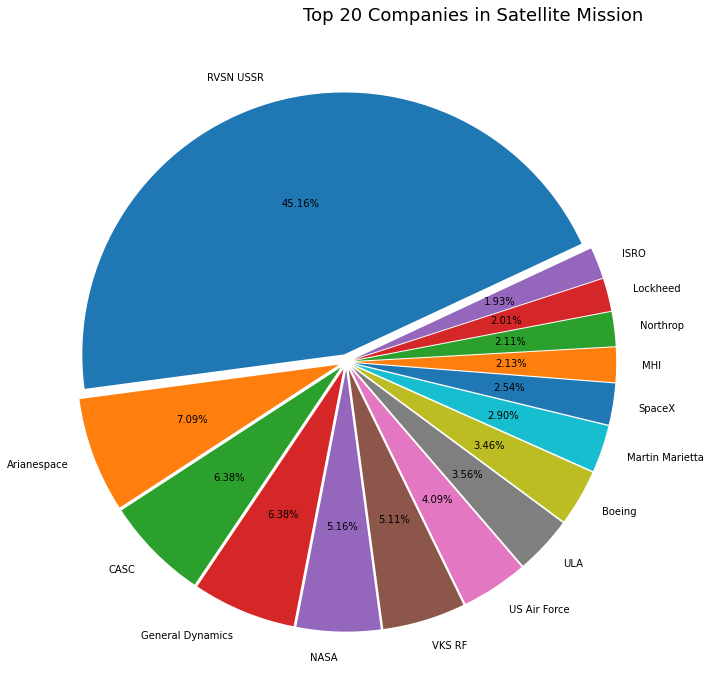

In [99]:
labels=list(df["Company Name"].value_counts()[:15].keys())
sizes=df["Company Name"].value_counts()[:15]
explode=[]
for i in labels:
    explode.append(0.03)
plt.figure(figsize=(10,10))
plt.pie(sizes,labels=labels,explode=explode, autopct='%1.2f%%', startangle=25, shadow=False)
plt.title("Top 20 Companies in Satellite Mission", fontsize=18, loc="right")
plt.axis("equal")
plt.tight_layout()
print("Top 20 Companies in Satellite Mission: \n", format(df["Company Name"].value_counts()[:15]))

**RSVN USSR is the company to have most satellite missions**

Now lets plot the data between count vs year

<AxesSubplot:xlabel='count', ylabel='Year'>

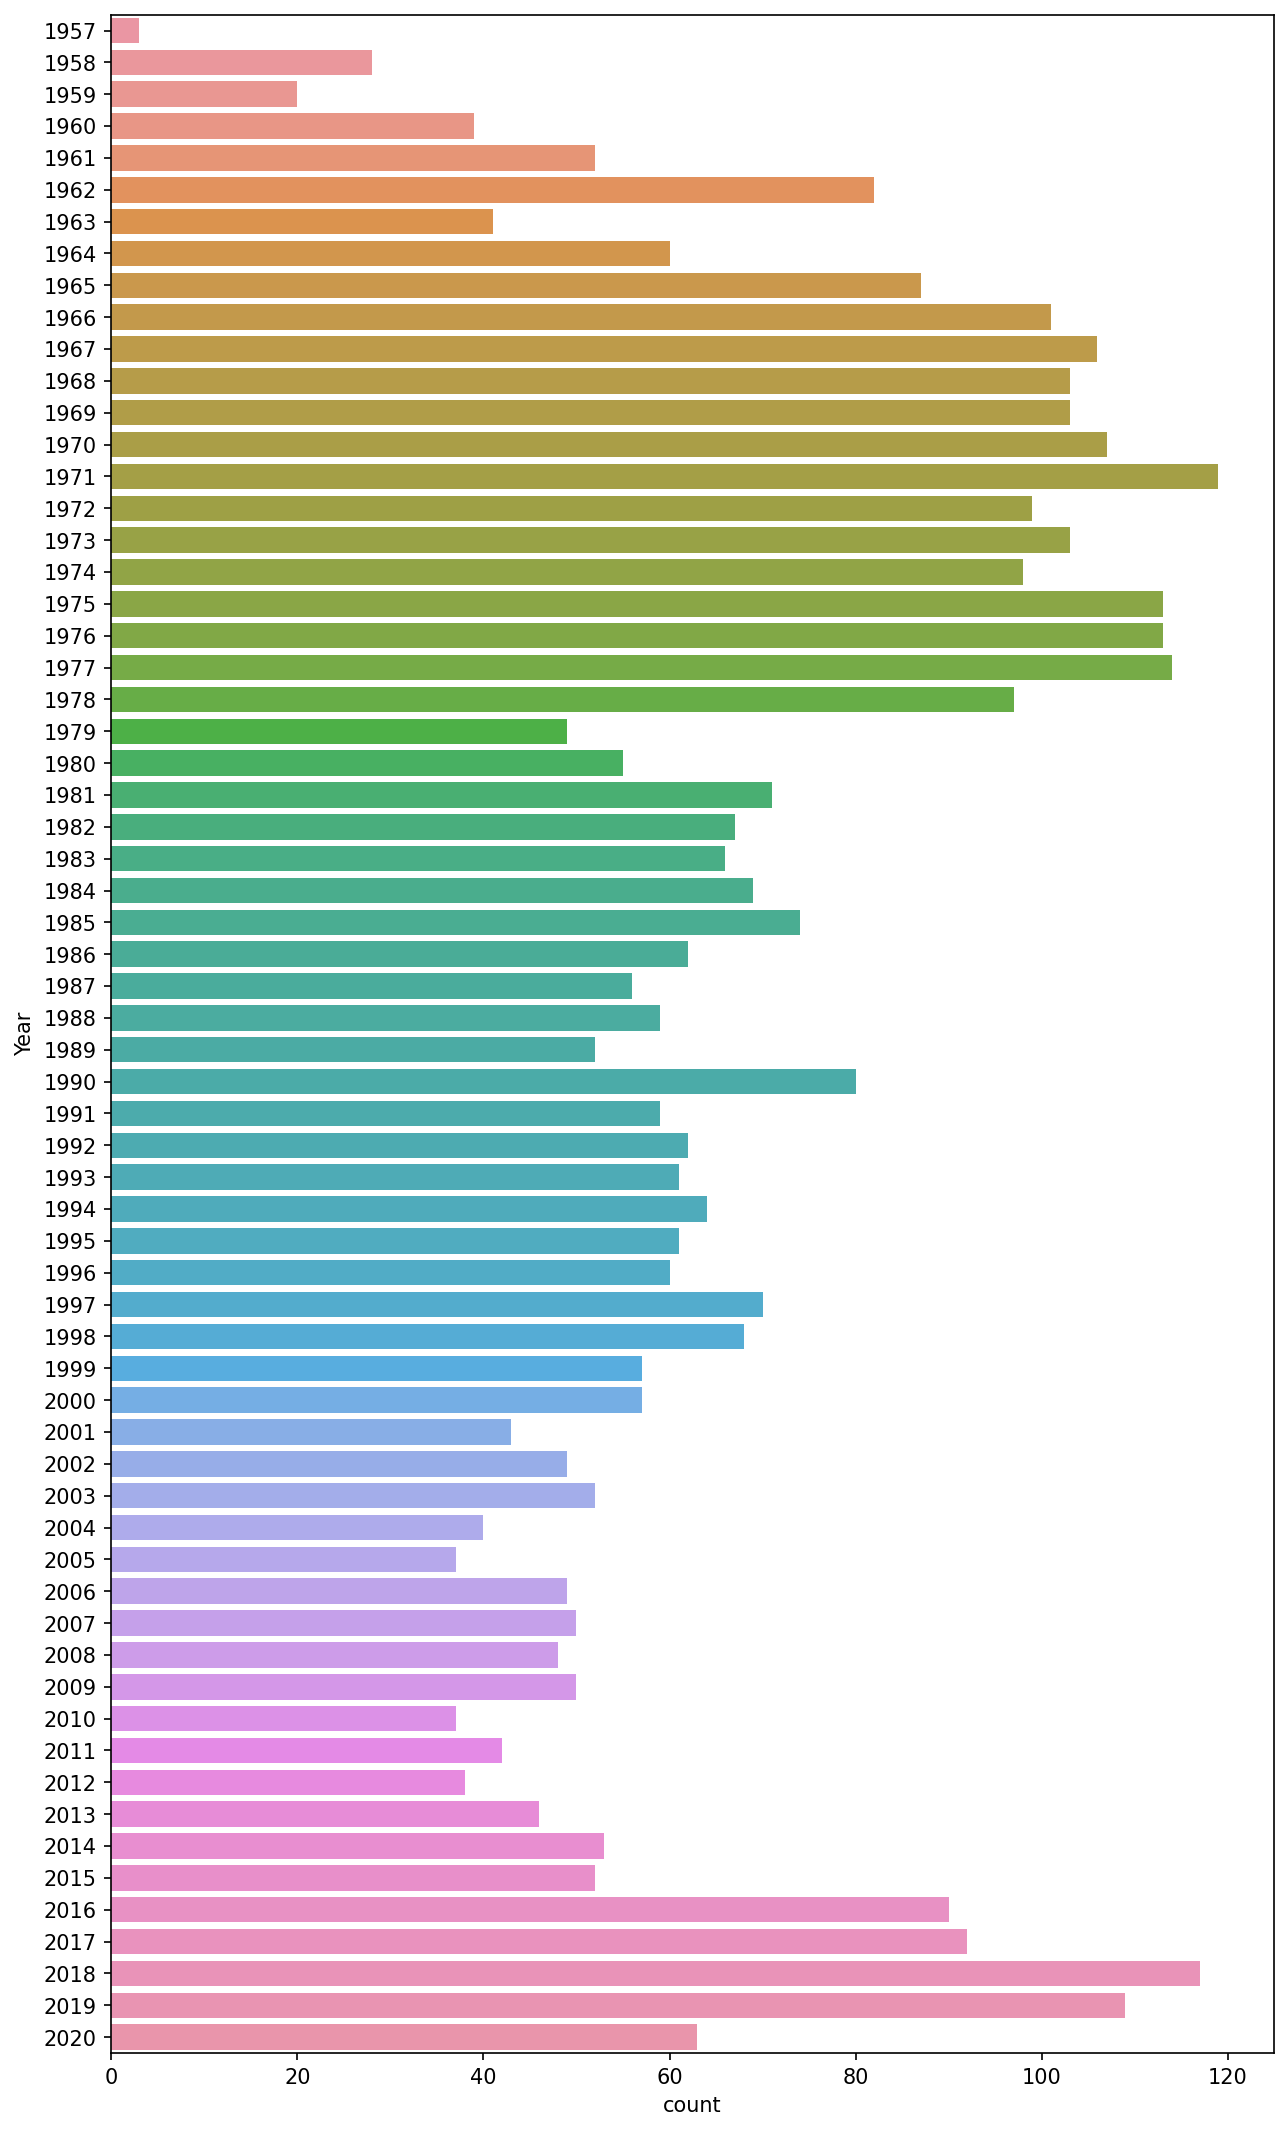

In [100]:
plt.figure(figsize=(10,18),dpi=150)
sns.countplot(data=df,y='Year')

So we infer from this plot that 1972 was the year in which most rockets were launched. It was the year when Apollo 16 was launched and the space race was at its peak. 2018 was the year with most launches after 1972. 

Lets plot the data between Count vs Mission Status

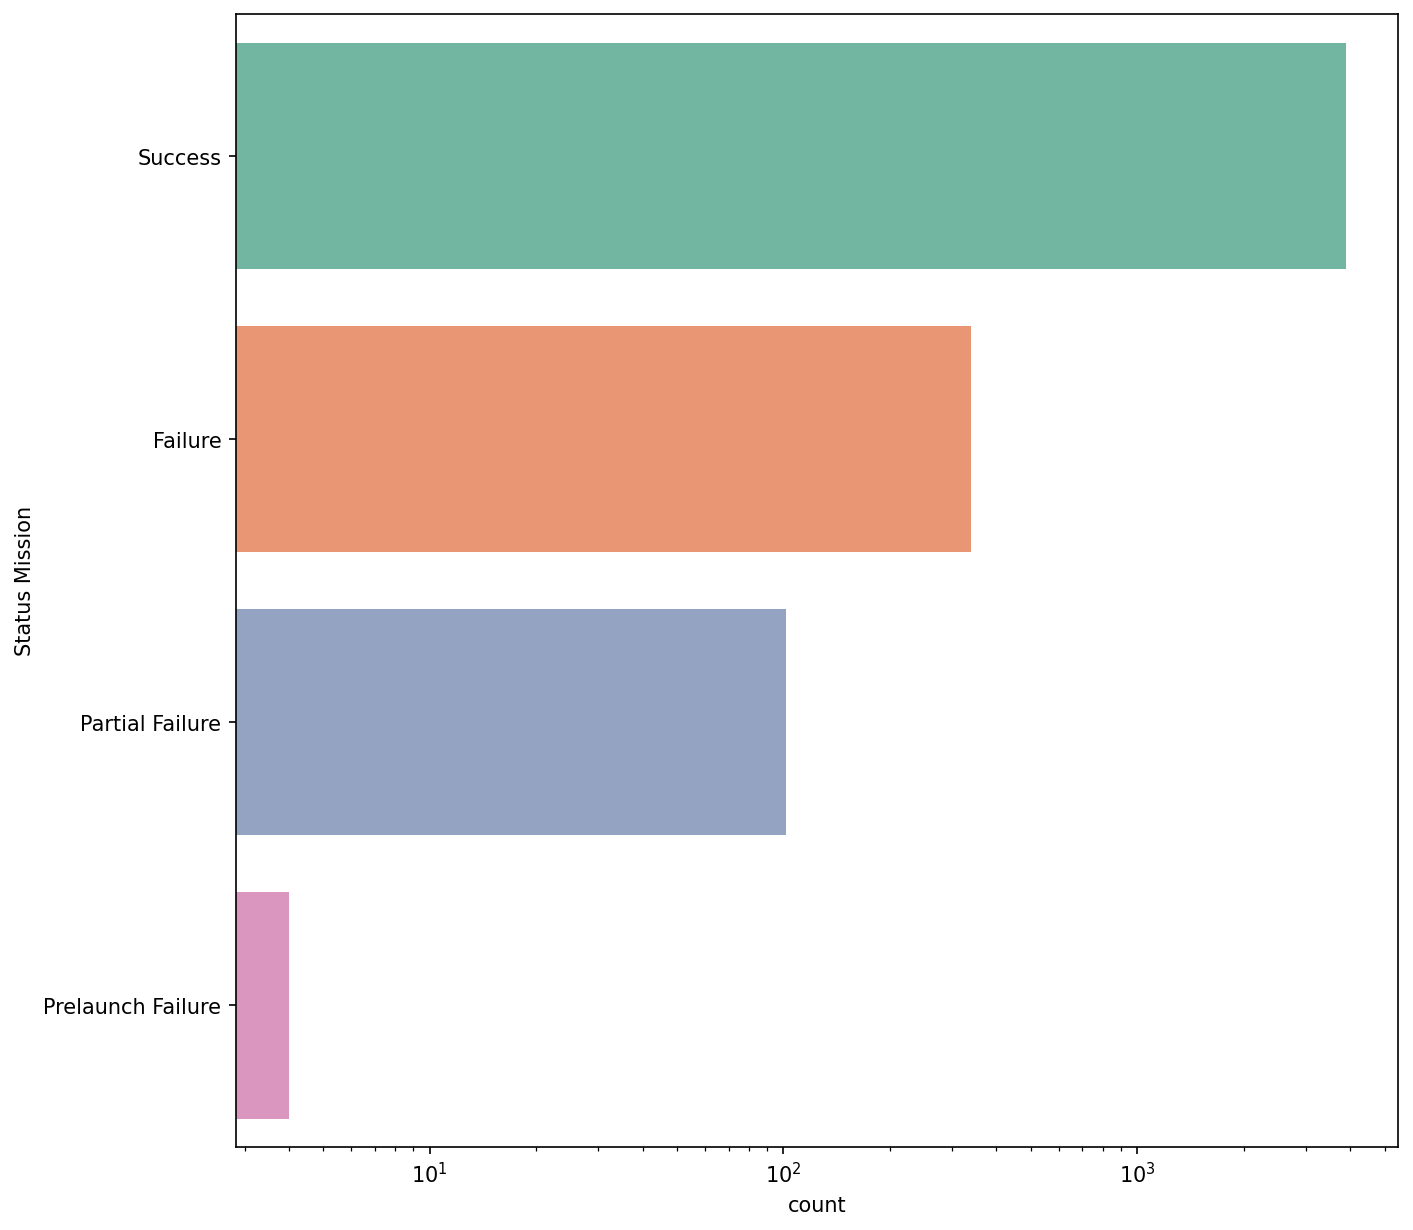

In [101]:
plt.figure(figsize=(10,10),dpi=150)
ax = sns.countplot(data=df,y='Status Mission',order=df["Status Mission"].value_counts().index, palette="Set2")
ax.set_xscale("log")

From the plot, its clearly visible that most of the missions were successful and some of the missions were a total failure.

Now, lets plot count vs status rocket

<AxesSubplot:xlabel='Status Rocket', ylabel='count'>

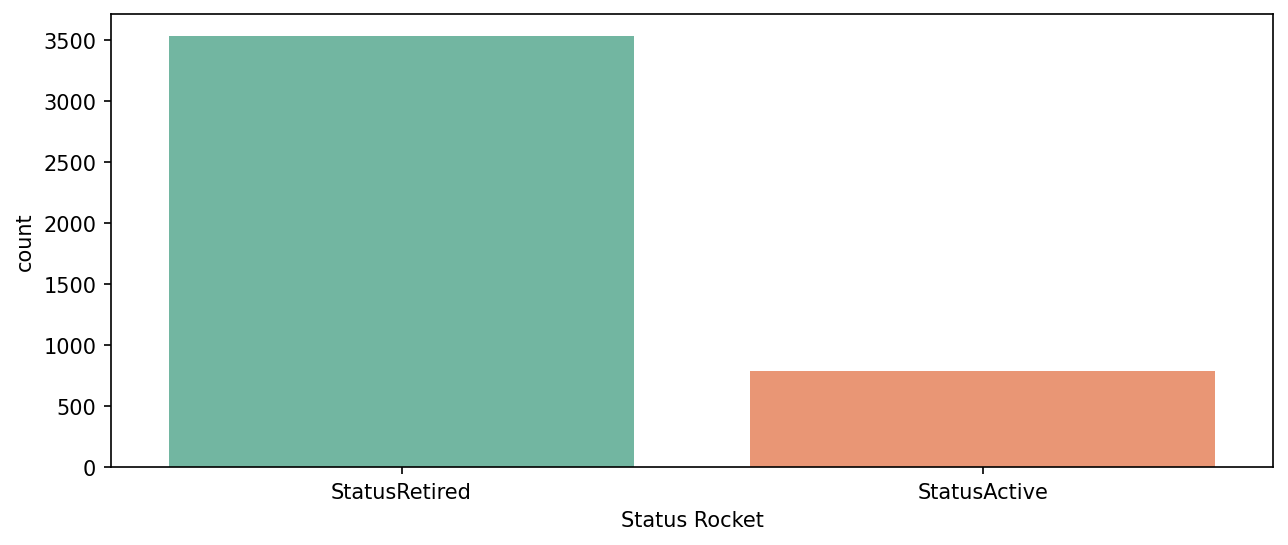

In [102]:
plt.figure(figsize=(10,4),dpi=150)
sns.countplot(x="Status Rocket",data=df,order=df["Status Rocket"].value_counts().index,palette='Set2')

Clearly, most of the launch vehicles used or the satellites launched are retired.

In [103]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Country,DateTime,Year,Launch_Site
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,2020-08-07 05:12:00+00:00,2020,"LC-39A, Kennedy Space Center, Florida"
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,2020-08-06 04:01:00+00:00,2020,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce..."
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,2020-08-04 23:57:00+00:00,2020,"Pad A, Boca Chica, Texas"
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,2020-07-30 21:25:00+00:00,2020,"Site 200/39, Baikonur Cosmodrome"
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,2020-07-30 11:50:00+00:00,2020,"SLC-41, Cape Canaveral AFS, Florida"


# ISRO Data Analysis
![](https://www.isro.gov.in/sites/default/files/galleries/गैलरी/19take.jpg)

In [104]:
df_isro=df[df["Company Name"]=="ISRO"]

In [105]:
df_isro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 72 to 2502
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      76 non-null     int64 
 1   Unnamed: 0.1    76 non-null     int64 
 2   Company Name    76 non-null     object
 3   Location        76 non-null     object
 4   Datum           76 non-null     object
 5   Detail          76 non-null     object
 6   Status Rocket   76 non-null     object
 7    Rocket         67 non-null     object
 8   Status Mission  76 non-null     object
 9   Country         76 non-null     object
 10  DateTime        76 non-null     object
 11  Year            76 non-null     int64 
 12  Launch_Site     76 non-null     object
dtypes: int64(3), object(10)
memory usage: 8.3+ KB


In [106]:
df_isro.head(10)

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Country,DateTime,Year,Launch_Site
72,72,72,ISRO,"First Launch Pad, Satish Dhawan Space Centre, ...","Wed Dec 11, 2019 09:55 UTC",PSLV-QL | RISAT 2BR1,StatusActive,21.0,Success,India,2019-12-11 09:55:00+00:00,2019,"First Launch Pad, Satish Dhawan Space Centre"
80,80,80,ISRO,"Second Launch Pad, Satish Dhawan Space Centre,...","Wed Nov 27, 2019 03:58 UTC",PSLV-XL | Cartosat-3 & Rideshares,StatusActive,31.0,Success,India,2019-11-27 03:58:00+00:00,2019,"Second Launch Pad, Satish Dhawan Space Centre"
121,121,121,ISRO,"Second Launch Pad, Satish Dhawan Space Centre,...","Mon Jul 22, 2019 09:13 UTC",GSLV Mk III | Chandrayaan-2 lunar mission,StatusActive,62.0,Success,India,2019-07-22 09:13:00+00:00,2019,"Second Launch Pad, Satish Dhawan Space Centre"
138,138,138,ISRO,"First Launch Pad, Satish Dhawan Space Centre, ...","Wed May 22, 2019 00:00 UTC",PSLV-CA | RISAT-2B,StatusActive,21.0,Success,India,2019-05-22 00:00:00+00:00,2019,"First Launch Pad, Satish Dhawan Space Centre"
149,149,149,ISRO,"Second Launch Pad, Satish Dhawan Space Centre,...","Mon Apr 01, 2019 03:57 UTC",PSLV-QL | EMISAT & Rideshares,StatusActive,21.0,Success,India,2019-04-01 03:57:00+00:00,2019,"Second Launch Pad, Satish Dhawan Space Centre"
164,164,164,ISRO,"First Launch Pad, Satish Dhawan Space Centre, ...","Thu Jan 24, 2019 18:07 UTC",PSLV-DL | Microsat-R,StatusActive,NaN,Success,India,2019-01-24 18:07:00+00:00,2019,"First Launch Pad, Satish Dhawan Space Centre"
179,179,179,ISRO,"Second Launch Pad, Satish Dhawan Space Centre,...","Wed Dec 19, 2018 10:40 UTC",GSLV Mk II | GSAT-7A,StatusActive,47.0,Success,India,2018-12-19 10:40:00+00:00,2018,"Second Launch Pad, Satish Dhawan Space Centre"
188,188,188,ISRO,"First Launch Pad, Satish Dhawan Space Centre, ...","Thu Nov 29, 2018 04:27 UTC",PSLV-CA | HySIS,StatusActive,21.0,Success,India,2018-11-29 04:27:00+00:00,2018,"First Launch Pad, Satish Dhawan Space Centre"
195,195,195,ISRO,"Second Launch Pad, Satish Dhawan Space Centre,...","Wed Nov 14, 2018 11:38 UTC",GSLV Mk III | GSAT 29,StatusActive,62.0,Success,India,2018-11-14 11:38:00+00:00,2018,"Second Launch Pad, Satish Dhawan Space Centre"
215,215,215,ISRO,"First Launch Pad, Satish Dhawan Space Centre, ...","Sun Sep 16, 2018 16:38 UTC",PSLV-CA | SSTL-1 & NovaSAR-S,StatusActive,21.0,Success,India,2018-09-16 16:38:00+00:00,2018,"First Launch Pad, Satish Dhawan Space Centre"


Lets see the plot of count vs Status Mission for isro

<AxesSubplot:xlabel='count', ylabel='Status Mission'>

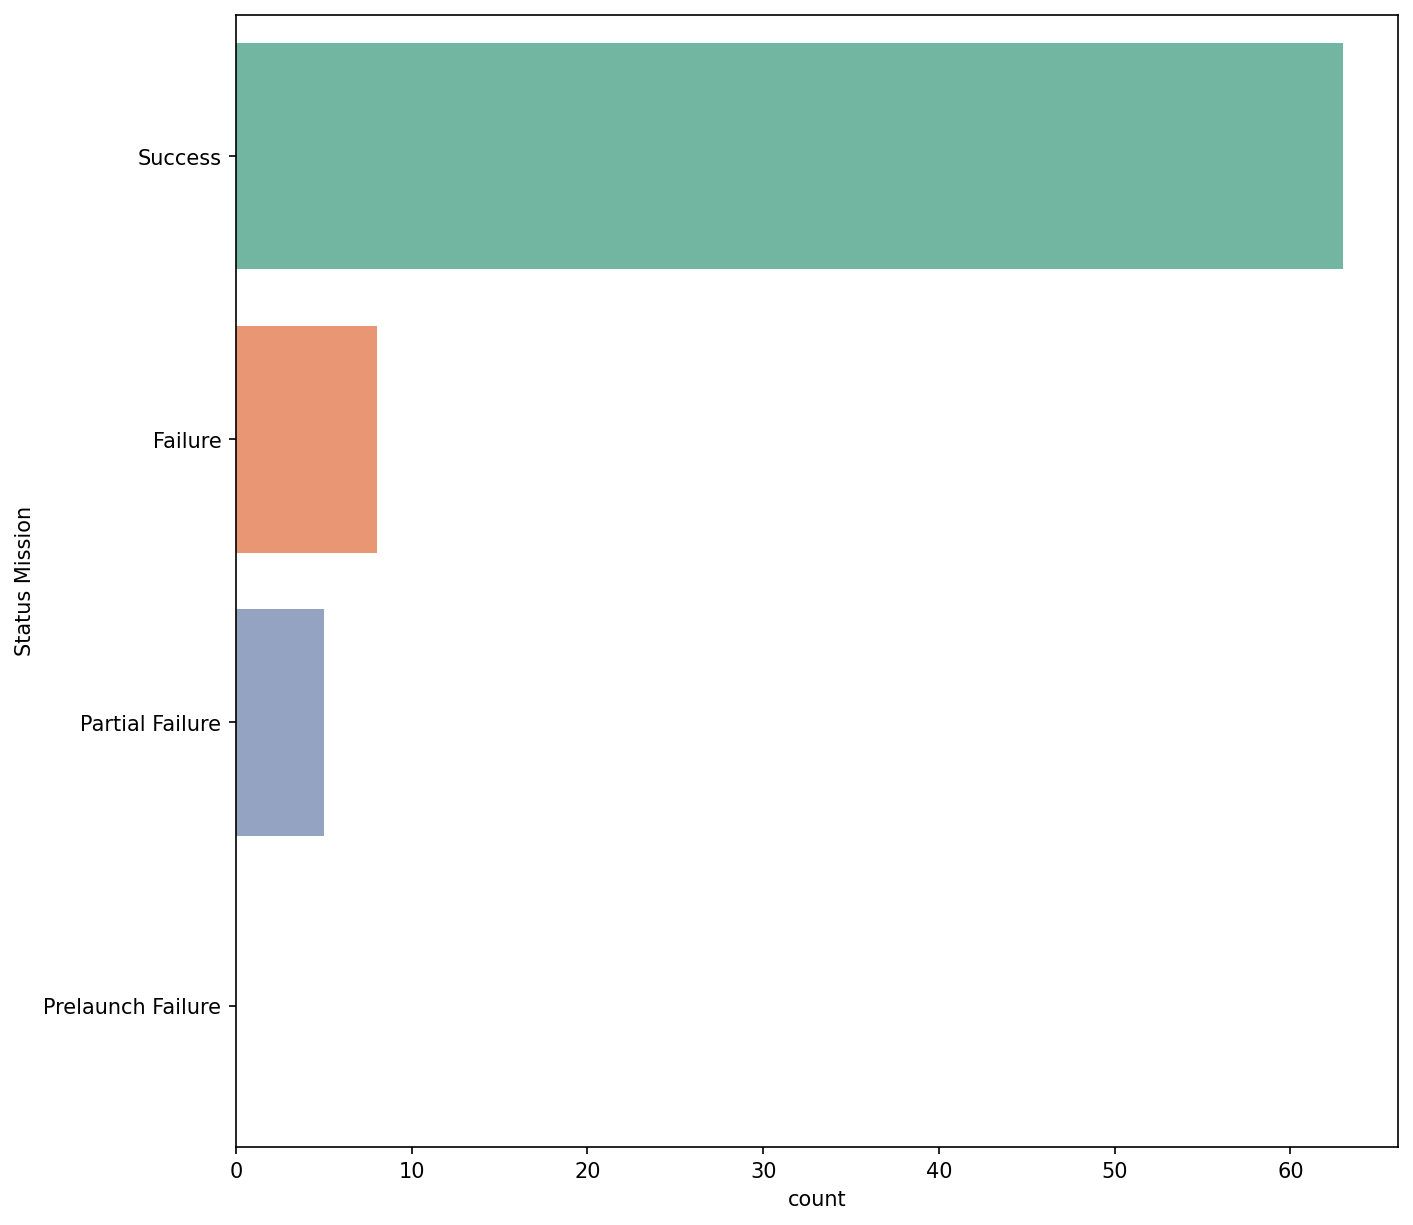

In [107]:
plt.figure(figsize=(10,10),dpi=150)
sns.countplot(data=df_isro,y='Status Mission',order=df["Status Mission"].value_counts().index, palette="Set2")

There are no prelaunch failures and most missions were successful

Now lets plot count vs year

<AxesSubplot:xlabel='count', ylabel='Year'>

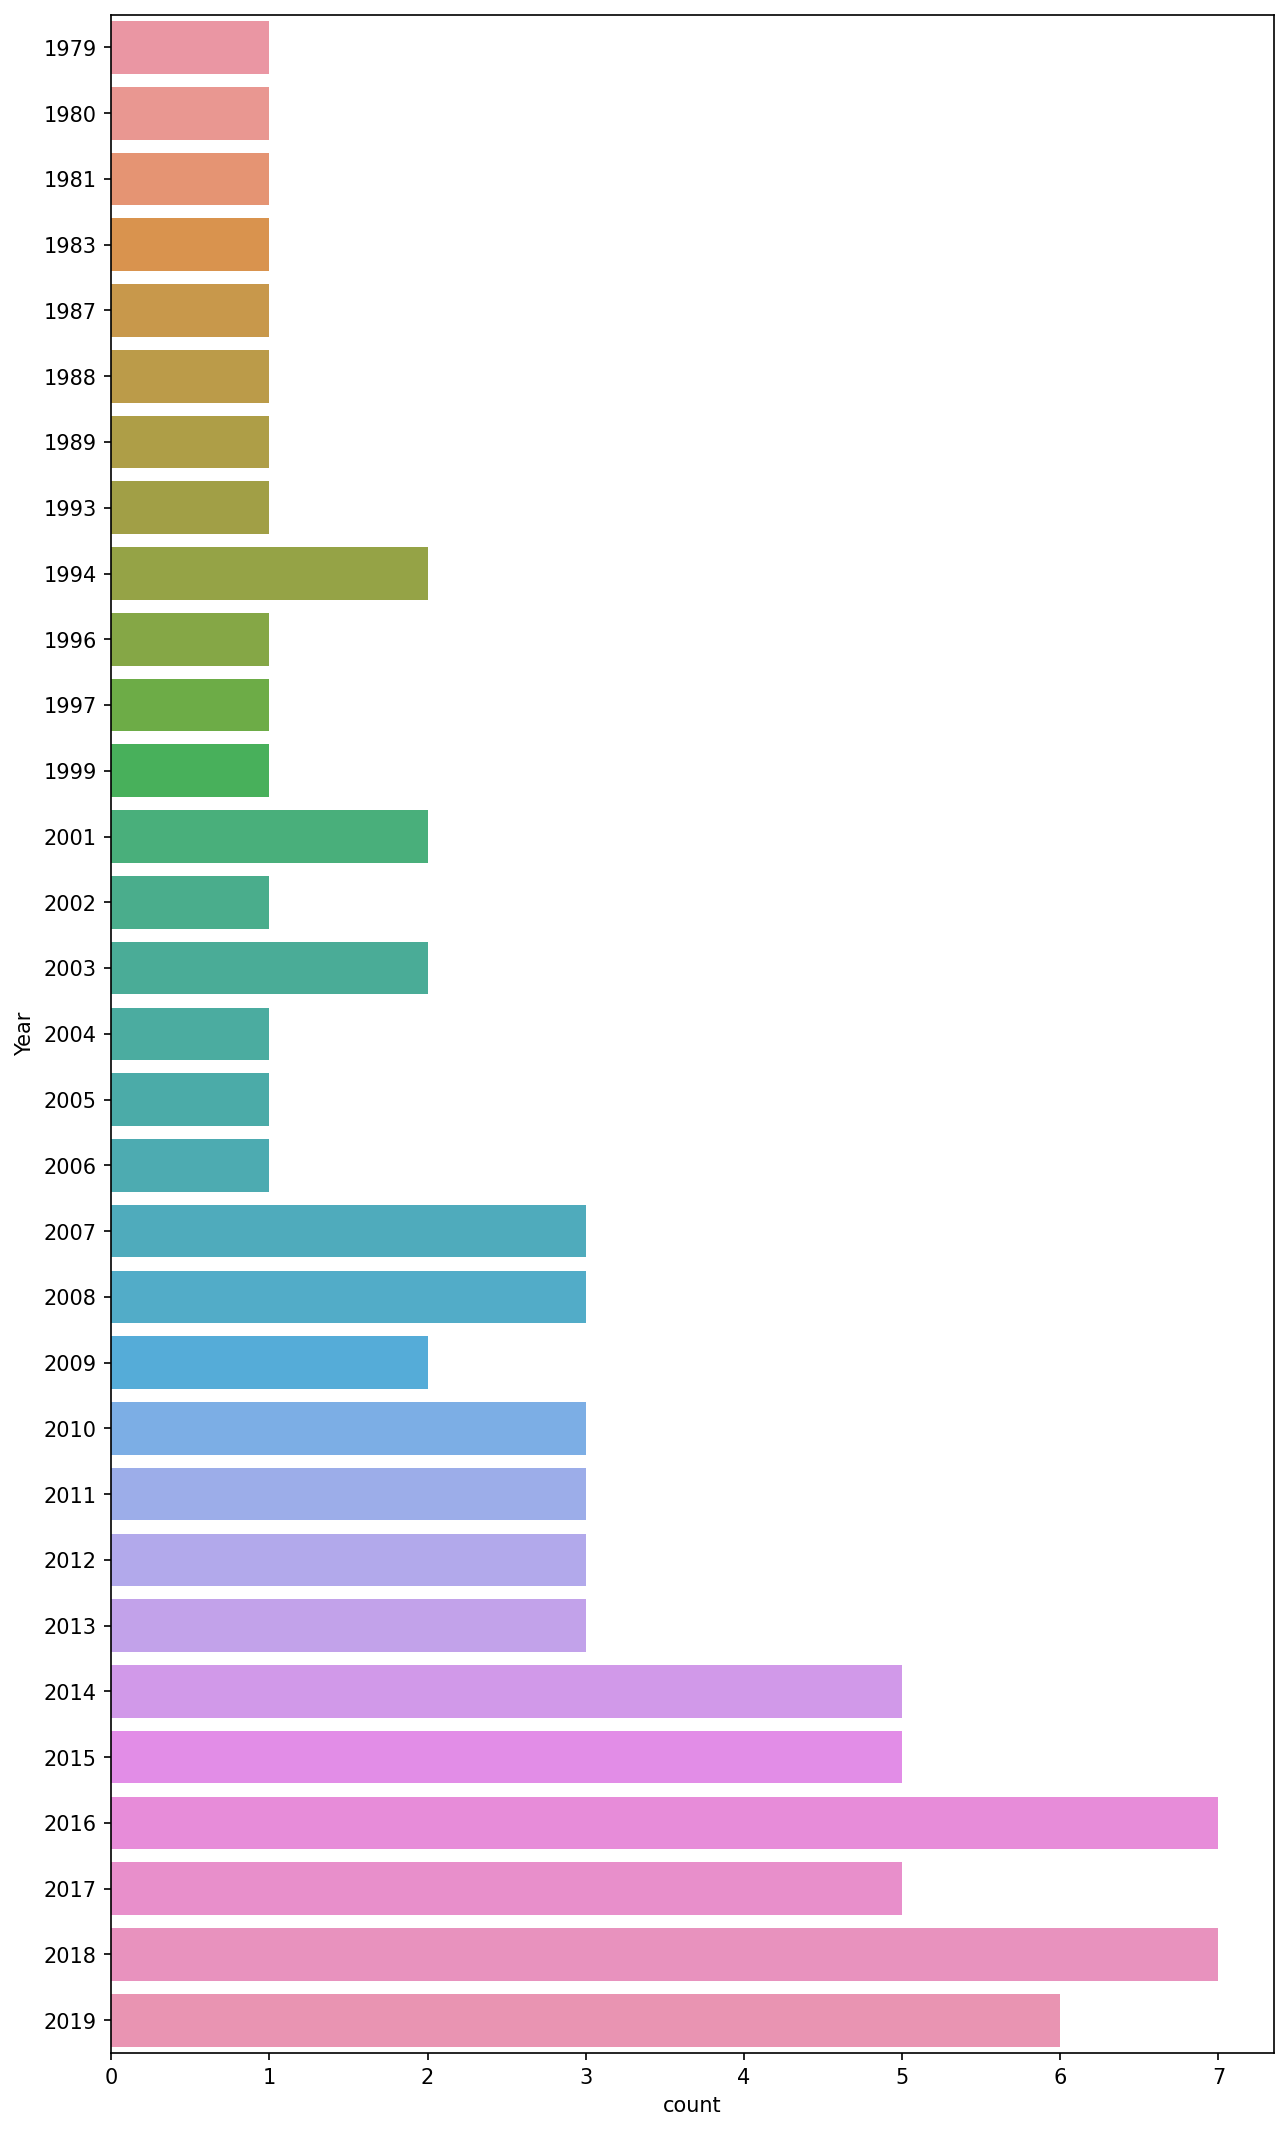

In [108]:
plt.figure(figsize=(10,18),dpi=150)
sns.countplot(data=df_isro,y='Year')

Now lets see which is the most used launch pad for isro

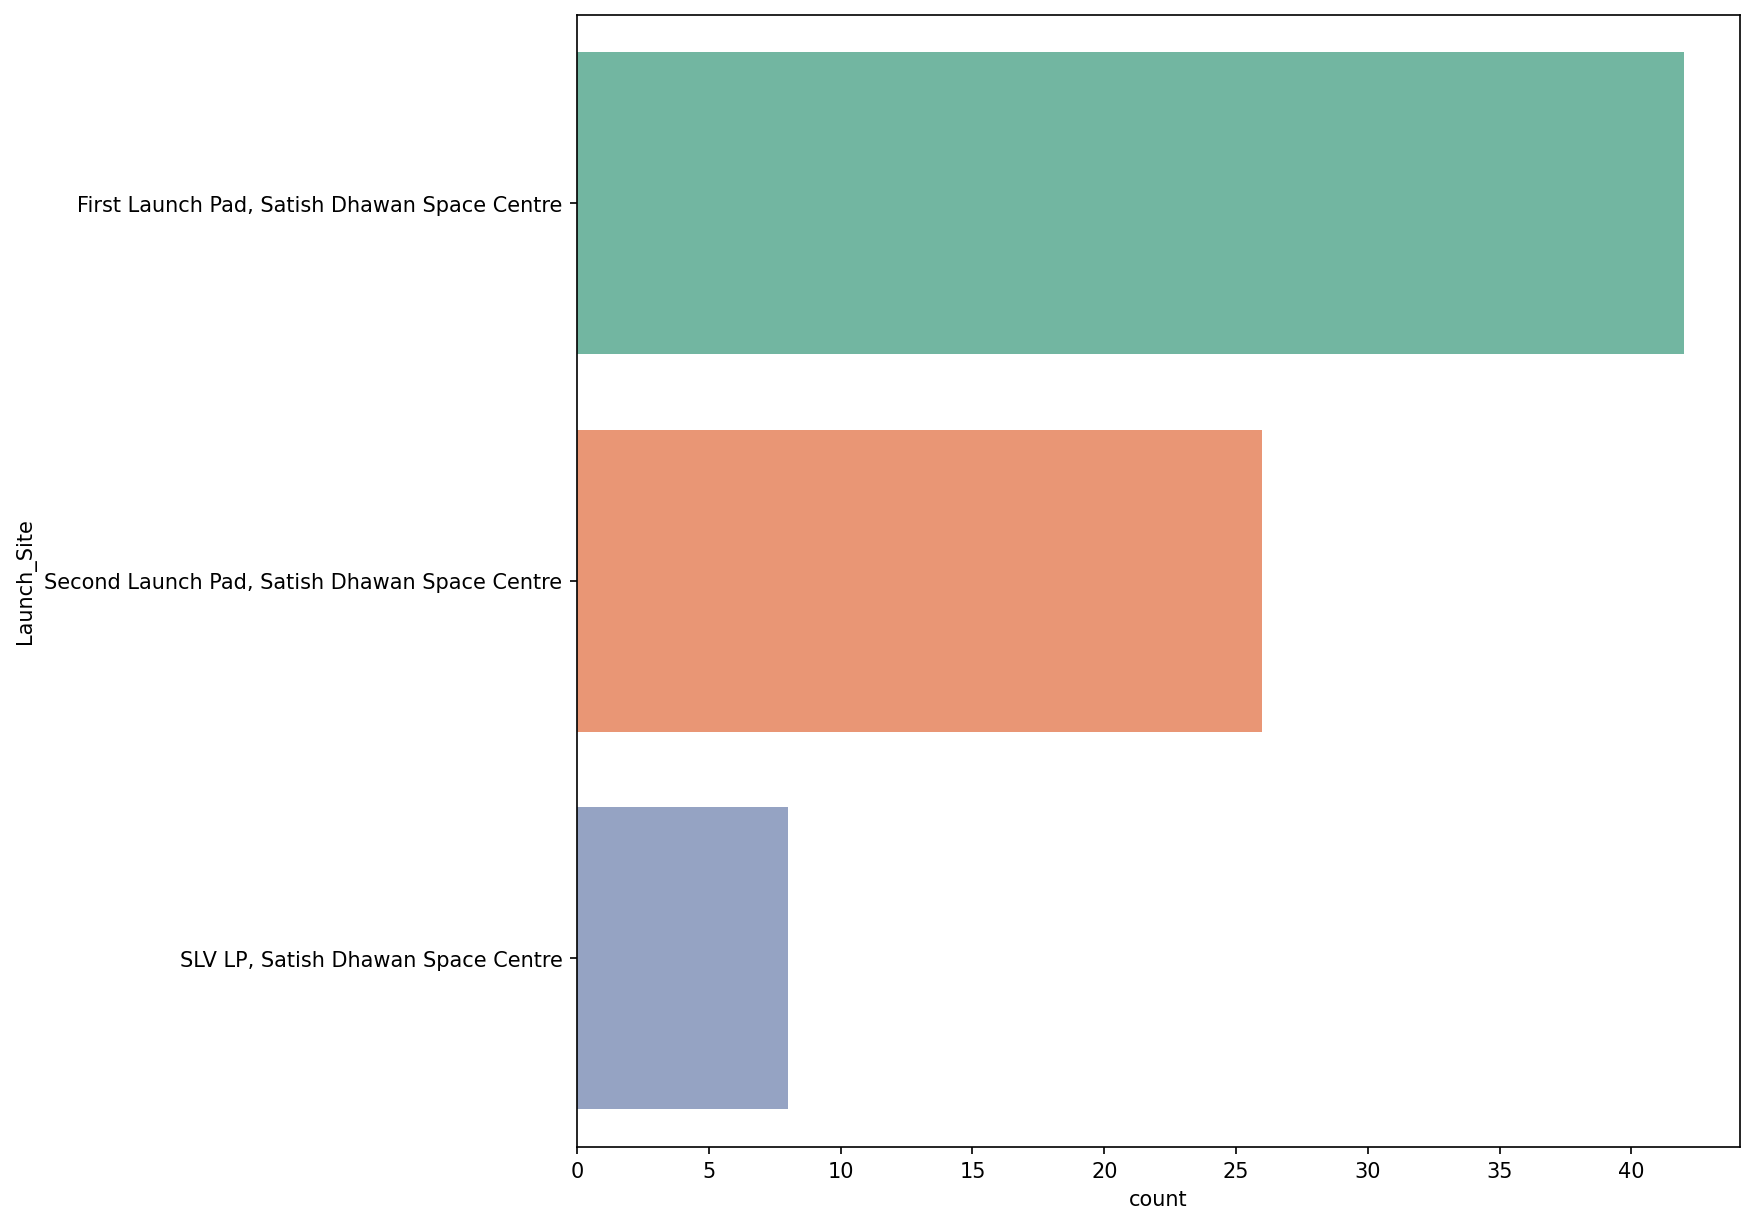

In [109]:
plt.figure(figsize=(10,10),dpi=150)
ax = sns.countplot(y="Launch_Site", data=df_isro, order=df_isro["Launch_Site"].value_counts().index,palette='Set2')

# Feature Engineering

When we try to build a model, we cant just pass null values to it. We need to fill those values somehow and feed it.

In [110]:
df.isnull().sum()# To find how many values are missing

Unnamed: 0           0
Unnamed: 0.1         0
Company Name         0
Location             0
Datum                0
Detail               0
Status Rocket        0
 Rocket           3360
Status Mission       0
Country              0
DateTime             0
Year                 0
Launch_Site          0
dtype: int64

So, 3360 rocket data is missing..

In [111]:
df[' Rocket'].unique()# finding out how many unique values are present

array(['50.0 ', '29.75 ', nan, '65.0 ', '145.0 ', '64.68 ', '48.5 ',
       '90.0 ', '46.0 ', '28.3 ', '29.15 ', '7.5 ', '30.8 ', '5.3 ',
       '12.0 ', '112.5 ', '120.0 ', '153.0 ', '200.0 ', '85.0 ', '115.0 ',
       '41.8 ', '21.0 ', '31.0 ', '40.0 ', '164.0 ', '62.0 ', '37.0 ',
       '350.0 ', '39.0 ', '47.0 ', '35.0 ', '69.7 ', '109.0 ', '45.0 ',
       '123.0 ', '130.0 ', '25.0 ', '56.5 ', '15.0 ', '29.0 ', '80.0 ',
       '140.0 ', '55.0 ', '59.5 ', '450.0 ', '7.0 ', '20.14 ', '133.0 ',
       '190.0 ', '135.0 ', '20.0 ', '136.6 ', '5,000.0 ', '1,160.0 ',
       '59.0 ', '63.23 '], dtype=object)

In [112]:
df[' Rocket'] = df[' Rocket'].astype(str).apply(lambda x: x.replace(',', '')).astype(np.float32)# converting 
                                                                            # all values to float type

In [113]:
df[' Rocket'] = df[' Rocket'].fillna(df[' Rocket'].mean())
# filling out the missing rocket data by the mean of all missing data
# fillna() allows us to fill the missing data

In [114]:
df.isnull().sum()

Unnamed: 0        0
Unnamed: 0.1      0
Company Name      0
Location          0
Datum             0
Detail            0
Status Rocket     0
 Rocket           0
Status Mission    0
Country           0
DateTime          0
Year              0
Launch_Site       0
dtype: int64

All data is filled.

In [115]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Country,DateTime,Year,Launch_Site
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00000,Success,USA,2020-08-07 05:12:00+00:00,2020,"LC-39A, Kennedy Space Center, Florida"
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75000,Success,China,2020-08-06 04:01:00+00:00,2020,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce..."
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,258.83847,Success,USA,2020-08-04 23:57:00+00:00,2020,"Pad A, Boca Chica, Texas"
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00000,Success,Kazakhstan,2020-07-30 21:25:00+00:00,2020,"Site 200/39, Baikonur Cosmodrome"
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00000,Success,USA,2020-07-30 11:50:00+00:00,2020,"SLC-41, Cape Canaveral AFS, Florida"


Next we need to make sure what columns would be ideal for a model to train. For example Detail,Datum has no need to be included in training data.

In [116]:
df=df.drop(['Unnamed: 0','Unnamed: 0.1','Location','Datum','Detail','DateTime','Launch_Site'],axis=1)
# Dropping unnecessary columns
# axis=1 means we are dropping columns, 0 would be for dropping rows

In [117]:
df.head(10)

,Company Name,Status Rocket,Rocket,Status Mission,Country,Year
0,SpaceX,StatusActive,50.00000,Success,USA,2020
1,CASC,StatusActive,29.75000,Success,China,2020
2,SpaceX,StatusActive,258.83847,Success,USA,2020
3,Roscosmos,StatusActive,65.00000,Success,Kazakhstan,2020
4,ULA,StatusActive,145.00000,Success,USA,2020
5,CASC,StatusActive,64.68000,Success,China,2020
6,Roscosmos,StatusActive,48.50000,Success,Kazakhstan,2020
7,CASC,StatusActive,258.83847,Success,China,2020
8,SpaceX,StatusActive,50.00000,Success,USA,2020
9,JAXA,StatusActive,90.00000,Success,Japan,2020


Another very important thing is that we cant pass string values to a model for training. We have to convert it to some numerical form for a model to understand.

In [118]:
df['Status Mission'].value_counts()# Counts of unique values of Status Mission column

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Status Mission, dtype: int64

The thing we intend to predict here is whether the mission will fail or not. So we have to reduce four unique values into two unique values.

In [119]:
df['Status Mission'] =df['Status Mission'].apply(lambda x: x if x == 'Success' else 'Failure')
# converting four unique values namely Success, Failure, Partial Failure and Prelaunch Failure 
# into just two values namely Success and Failure
df['Status Mission'].value_counts()

Success    3879
Failure     445
Name: Status Mission, dtype: int64

Now we have to convert those values into numerical form. The simplest way to do this is make value `success` 1 and `failure` 0. LabelEncoder helps us to do just that.

In [120]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()# creating an object of labelEncoder class
df['Status Mission'] = encoder.fit_transform(df['Status Mission'])# fit_transform() method scales all the data
                                                                  # and convertes it into 0 and 1.

In [121]:
df[:10]

,Company Name,Status Rocket,Rocket,Status Mission,Country,Year
0,SpaceX,StatusActive,50.00000,1,USA,2020
1,CASC,StatusActive,29.75000,1,China,2020
2,SpaceX,StatusActive,258.83847,1,USA,2020
3,Roscosmos,StatusActive,65.00000,1,Kazakhstan,2020
4,ULA,StatusActive,145.00000,1,USA,2020
5,CASC,StatusActive,64.68000,1,China,2020
6,Roscosmos,StatusActive,48.50000,1,Kazakhstan,2020
7,CASC,StatusActive,258.83847,1,China,2020
8,SpaceX,StatusActive,50.00000,1,USA,2020
9,JAXA,StatusActive,90.00000,1,Japan,2020


In [122]:
df['Status Mission'].value_counts()

1    3879
0     445
Name: Status Mission, dtype: int64

Similiarly, we convert Status Rocket into numerical form

In [123]:
encoder = LabelEncoder()
df['Status Rocket']=encoder.fit_transform(df['Status Rocket'])

In [124]:
df.head()

,Company Name,Status Rocket,Rocket,Status Mission,Country,Year
0,SpaceX,0,50.00000,1,USA,2020
1,CASC,0,29.75000,1,China,2020
2,SpaceX,0,258.83847,1,USA,2020
3,Roscosmos,0,65.00000,1,Kazakhstan,2020
4,ULA,0,145.00000,1,USA,2020


In [125]:
df['Status Rocket'].value_counts()

1    3534
0     790
Name: Status Rocket, dtype: int64

We can predict data for both company and country column, but I decided to drop Company Column.

In [127]:
df=df.drop(['Company Name'],axis=1)

### One hot encoding the Country Column

In [ ]:
def onehot_encode(data, column):
    dummies = pd.get_dummies(data[column])
    data = pd.concat([data, dummies], axis=1)
    data.drop(column, axis=1, inplace=True)
    return data

In [128]:
df.head()

,Status Rocket,Rocket,Status Mission,Country,Year
0,0,50.00000,1,USA,2020
1,0,29.75000,1,China,2020
2,0,258.83847,1,USA,2020
3,0,65.00000,1,Kazakhstan,2020
4,0,145.00000,1,USA,2020


In [129]:
df=onehot_encode(df,'Country')

In [130]:
df.head()

,Status Rocket,Rocket,Status Mission,Year,Australia,Barents Sea,Brazil,China,France,Gran Canaria,...,New Mexico,New Zealand,North Korea,Pacific Missile Range Facility,Pacific Ocean,Russia,Shahrud Missile Test Site,South Korea,USA,Yellow Sea
0,0,50.00000,1,2020,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,29.75000,1,2020,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,258.83847,1,2020,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,65.00000,1,2020,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,145.00000,1,2020,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Segregating the X and y values. What that means is given X data columns, we have to predict y. So, y will only have 1 column and X should not have that column.

In [131]:
X=df.drop('Status Mission',axis=1)
y=df['Status Mission']

In [132]:
X.head()

,Status Rocket,Rocket,Year,Australia,Barents Sea,Brazil,China,France,Gran Canaria,India,...,New Mexico,New Zealand,North Korea,Pacific Missile Range Facility,Pacific Ocean,Russia,Shahrud Missile Test Site,South Korea,USA,Yellow Sea
0,0,50.00000,2020,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,29.75000,2020,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,258.83847,2020,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,65.00000,2020,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,145.00000,2020,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [133]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Status Mission, dtype: int64

Splitting the dataset into train and test.

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,random_state=101)

In [135]:
X_train.head()

,Status Rocket,Rocket,Year,Australia,Barents Sea,Brazil,China,France,Gran Canaria,India,...,New Mexico,New Zealand,North Korea,Pacific Missile Range Facility,Pacific Ocean,Russia,Shahrud Missile Test Site,South Korea,USA,Yellow Sea
3677,1,59.00000,1968,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1683,1,258.83847,1992,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1193,1,258.83847,2000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2266,1,258.83847,1983,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2968,1,258.83847,1975,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Using StandardScalar to scale the data

In [136]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

In [137]:
scaled_X_train

array([[ 0.47026172, -1.11200353, -1.07893777, ..., -0.02571722,
         1.50125396, -0.01818182],
       [ 0.47026172,  0.13315548,  0.25227945, ..., -0.02571722,
        -0.66610982, -0.01818182],
       [ 0.47026172,  0.13315548,  0.69601852, ..., -0.02571722,
         1.50125396, -0.01818182],
       ...,
       [-2.12647544, -0.23345687,  1.41709452, ..., -0.02571722,
        -0.66610982, -0.01818182],
       [ 0.47026172,  0.13315548,  0.52961637, ..., -0.02571722,
         1.50125396, -0.01818182],
       [ 0.47026172,  0.13315548,  0.36321422, ..., -0.02571722,
        -0.66610982, -0.01818182]])

using Logistic Regression Model for Prediction

In [138]:
from sklearn.linear_model import LogisticRegressionCV
log_model=LogisticRegressionCV()
log_model.fit(scaled_X_train,y_train)

LogisticRegressionCV()

In [139]:
y_pred=log_model.predict(scaled_X_test)

In [140]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [141]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [142]:
accuracy_score(y_test,y_pred)

0.9067796610169492

In [143]:
confusion_matrix(y_test,y_pred)

array([[   5,  118],
       [   3, 1172]])

In [144]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.04      0.08       123
           1       0.91      1.00      0.95      1175

    accuracy                           0.91      1298
   macro avg       0.77      0.52      0.51      1298
weighted avg       0.88      0.91      0.87      1298



We see that the acuuracy is 90%, but seeing the classification report we infer that 118 predictions for failure have been given wrong by our model. So this model is not good at all.